#Set record number#

In [0]:
k = 100000

#Create noise array#

In [13]:
import numpy as np
np.set_printoptions(suppress=True)
noise = np.random.normal(0,1,k)
noise

array([-1.7967283 , -0.4471062 , -1.90216506, ..., -0.03651783,
        0.27939969, -1.0374091 ])

In [14]:
noise.size

100000

#Create first variable (source1) through autoregression:# 
S1(n)=0.95*√2*S1(n-1) - 0.90*S1(n-2) + ε1

In [0]:
source1 = np.zeros((k))
import math
source1[1] = noise[1] + 10
source1[2] = noise[2] + 10
for x in range(3,k):
  source1[x] = 0.95*math.sqrt(2)*source1[x-1] - 0.90*source1[x-2] + noise[x]


source1
np.savetxt("source1.csv", source1, delimiter=",")
#def oneTimeSeries(x0, x1, noise, 100):
#  noise[] = 0.95*x0 - 0.92*x0

from google.colab import files
files.download( "source1.csv" ) 


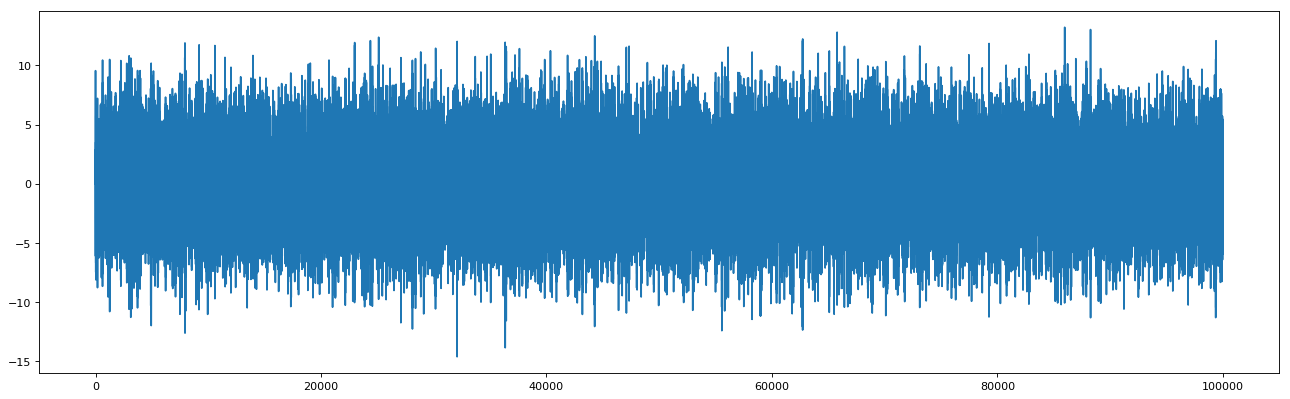

In [16]:
#import matplotlib.pylab as plt
import matplotlib.pyplot as plt
# plot the line
from matplotlib.pyplot import figure
figure(num=None, figsize=(20, 6), dpi=80, facecolor='w', edgecolor='k')
#plt.figure(figsize=(20,10))
plt.plot(source1)

#from matplotlib.pyplot import figure
#figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
#plt.set_size_inches(11,8)
#plot.show()
plt.show()

#Create variable source2 through autoregression#

S2(n)=0.5*S2(n-1) + ε2

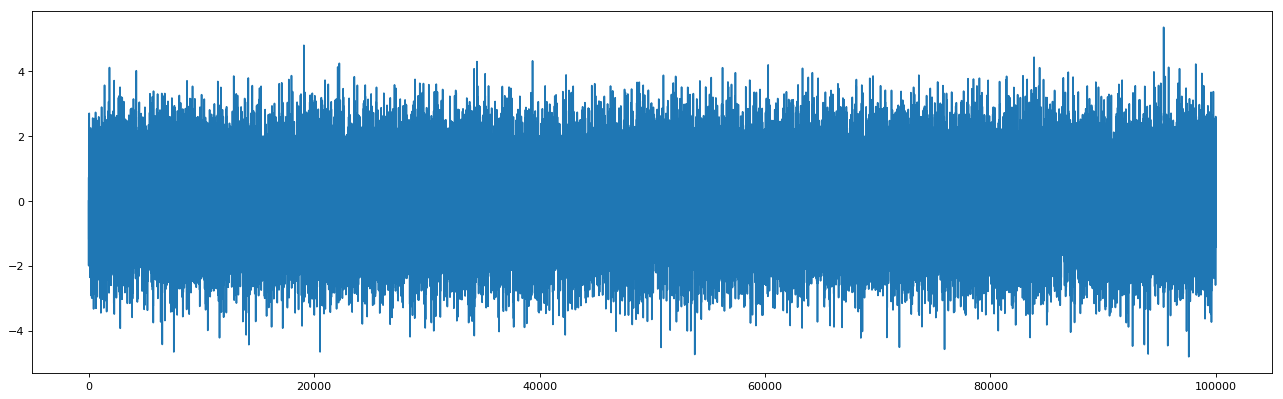

In [17]:
source2 = np.zeros((k))
np.set_printoptions(suppress=True)
noise2 = np.random.normal(0,1,k)
noise2
import math
source2[1] = noise2[1]
source2[2] = noise2[2]
for x in range(3,k):
  source2[x] = 0.5*source2[x-2] + noise2[x]


source2
np.savetxt("source2.csv", source2, delimiter=",")
#def oneTimeSeries(x0, x1, noise, 100):
#  noise[] = 0.95*x0 - 0.92*x0

from google.colab import files
files.download( "source2.csv" )

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(num=None, figsize=(20, 6), dpi=80, facecolor='w', edgecolor='k')
#plt.figure(figsize=(20,10))
plt.plot(source2)

#from matplotlib.pyplot import figure
#figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
#plt.set_size_inches(11,8)
#plot.show()
plt.show()

#Create variable source3 based on autoregression source1 and source2#
S3(n)= -0.5*S1(n-1) + 0.25 * √2  * S3(n-1) + 0.25 * √2  * S2(n-1) + ε3

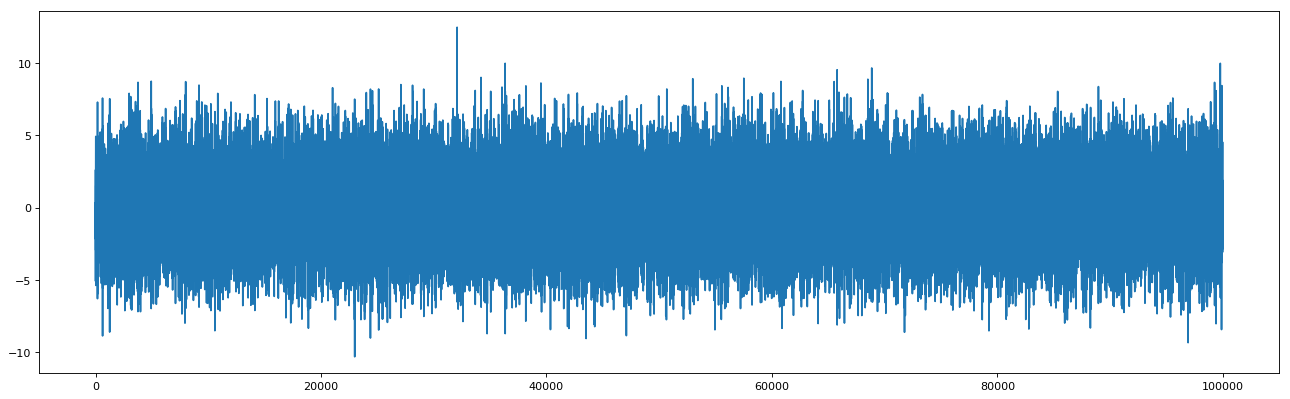

In [18]:
source3 = np.zeros((k))
np.set_printoptions(suppress=True)
noise3 = np.random.normal(0,1,k)
noise3
import math
source3[1] = noise3[1]
source3[2] = noise3[2]
for x in range(3,k):
  source3[x] = -0.5*source1[x-1] + 0.25*math.sqrt(2)*source3[x-1] +0.25*math.sqrt(2)*source2[x-1] + noise3[x]


source2
np.savetxt("source3.csv", source3, delimiter=",")
#def oneTimeSeries(x0, x1, noise, 100):
#  noise[] = 0.95*x0 - 0.92*x0

from google.colab import files
files.download( "source3.csv" )

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(num=None, figsize=(20, 6), dpi=80, facecolor='w', edgecolor='k')
#plt.figure(figsize=(20,10))
plt.plot(source3)

#from matplotlib.pyplot import figure
#figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
#plt.set_size_inches(11,8)
#plot.show()
plt.show()

#Create variable source4 based on autoregression, and source3#

S4(n)= 0.95*S4(n-1) - 0.25 * √2  * S3(n-1) + ε4

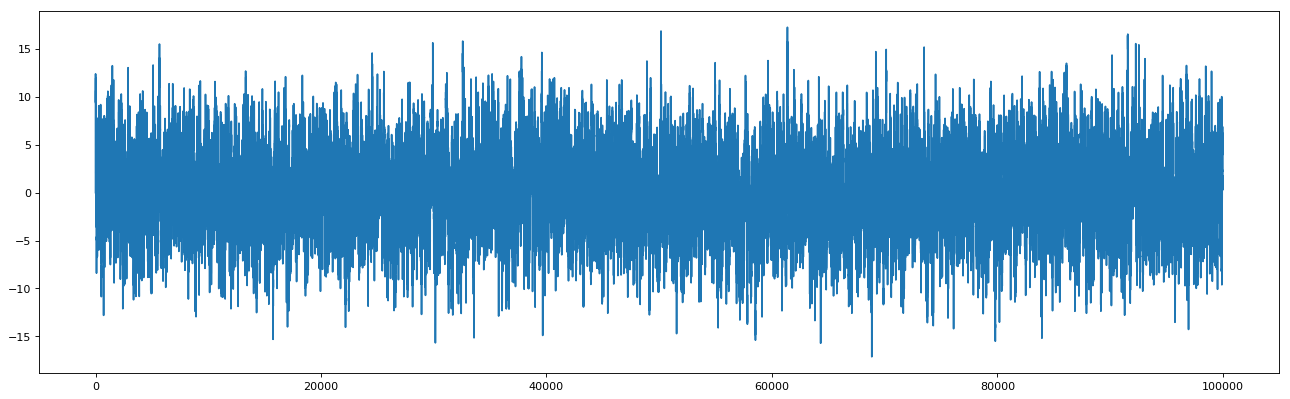

In [19]:
source4 = np.zeros((k))
np.set_printoptions(suppress=True)
noise4 = np.random.normal(0,1,k)
import math
source4[1] = noise4[1] + 10
source4[2] = noise4[2] + 10
for x in range(3,k):
  source4[x] = 0.95*source4[x-1] - 0.25*math.sqrt(2)*source3[x-1] + noise4[x]


source4
np.savetxt("source4.csv", source4, delimiter=",")
#def oneTimeSeries(x0, x1, noise, 100):
#  noise[] = 0.95*x0 - 0.92*x0

from google.colab import files
files.download( "source4.csv" ) 

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(num=None, figsize=(20, 6), dpi=80, facecolor='w', edgecolor='k')
#plt.figure(figsize=(20,10))
plt.plot(source4)

#from matplotlib.pyplot import figure
#figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
#plt.set_size_inches(11,8)
#plot.show()
plt.show()

In [0]:
combined = np.vstack((source1, source2, source3, source4)).T
np.savetxt("combined.csv", combined, delimiter=",", fmt='%f')
from google.colab import files
files.download( "combined.csv" ) 

In [21]:
combined

array([[ 0.        ,  0.        ,  0.        ,  0.        ],
       [ 9.5528938 ,  0.62588297,  0.33682579, 10.32058857],
       [ 8.09783494, -1.29417325, -0.80026341,  8.49297507],
       ...,
       [ 0.03678625,  0.42661197,  0.58635252,  0.36732244],
       [ 0.92767802,  0.94282989,  1.54093192,  0.2745682 ],
       [ 0.17582136, -0.20441927,  1.19253615,  1.72364144]])